# 과제4_신용평가모델_비즈니스평가

* 고객사는 ## 은행입니다. 신용평가 업무를 인공지능으로 전환하고자 여러분에게 모델링을 의뢰하였습니다.
* 대출업무는
    * 은행 창구에서 신청을 받고
    * 본사의 심사부서에서는 신용평가를 통해 대출 신청에 대한 승인 여부를 결정해 왔습니다.

* 현장의 요구
    * 경쟁사의 공격적인 대출상품 판매로, 본사에서는 자사 은행의 대출 실적이 줄어들고 있는 것에 부담을 느끼고 있습니다.
    * 그런데, 자사 은행에서는 신용평가 결과의 정확성에 의문을 품고 있으며, 신용평가 기준을 완화하여 가급적 대출승인 범위를 더 확대해 주기를 요구합니다.

* 신용평가 업무를 인공지능으로 전환
    * 현장의 요구를 감안하여, 과거 사람이 하던 평가방식을 개선하고자 인공지능에 의한 예측 모델을 만들고, 정확도를 높이고자 합니다.
-----------------


* 이제 인공지능에 의한 신용평가 시스템은 큰 무리 없이 작동하며 한 달여 운영되어 오고 있습니다. 한 달 동안의 운영 보고서를 작성해야 할 시점입니다.

* 그런데, 인공지능 신용평가 시스템에 대해 처음부터 부정적인 견해를 가져온 고객사 임원이, 심사 기간 단축 말고 구체적으로 **어떤 비즈니스 성과를 가져다 줄 것인지**를 설명해 달라고 요구 해 왔습니다.

* 또 다시 여러분에게 미션이 주어졌습니다. 인공지능 모델을 어떻게 비즈니스 성과로 연결할 수 있을까요?
* 고객사의 과거자료를 검토하며 다음과 같이 대출 수익구조를 정리하게 되었습니다.
    * 제 때 대출이자와 원금을 상환하는 고객으로부터, 평균적으로 대출금의 약 4%(연) 이자 수익이 발생 되었습니다.
    * 제 때 상환하지 않는 고객으로 인해, 평균적으로 약 9%의 원금 손실(연)이 발생됩니다.
    * 평균 대출 금액은 약 3200달러, 평균 대출 기간은 2년 입니다.



## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

### 2) 데이터 로딩

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/credit_all.csv'
data = pd.read_csv(path)
data.loc[data['Payment'] == 4, 'Payment'] = 3
data.head()

,Creditability,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,SexMarital,CurrentAddress,MostValuableAsset,Age,Apartment,CreditCount,Occupation,Dependents,Telephone,ForeignWorker
0,1,3,24,2,0,1249,2,4,2,1,28,2,1,3,1,1,1
1,1,2,9,2,0,276,3,4,4,1,22,1,1,2,1,1,1
2,1,1,18,3,2,1049,2,2,4,2,21,1,1,3,1,1,1
3,1,1,24,3,1,6419,5,2,4,4,44,3,2,4,2,2,1
4,1,3,12,2,2,1424,5,2,4,1,55,2,1,4,1,2,1


|	칼럼명	|	설명	|	 	|	값 의미	|
|	-----	|	-----	|	-----	|	-----	|
|	Creditability	|	Creditability(Target)	|	향후 신용도	|	0 : Bad, 1 : Good	|
|	AccountBalance	|	Account Balance	|	은행잔고	|	1: No account, 2 : None (No balance), 3 : Some Balance	|
|	CreditDuration	|	Duration of Credit (month)	|	신청한 대출기간(월)	|	숫자	|
|	Payment	|	Payment Status of Previous Credit	|	과거 대출 납입 상태	|	0 : 연체, 1 : 기타신용, 2 : 완납, 3 : 정상 대출상환 중 |
|	Purpose	|	Purpose	|	신청한 대출목적	|	1 : New Car , 2 : Used Car , 3 : Furniture , 4 : TV , 5 : Appliances , 6 : Repair , 8 : Vacation , 9 :Retraining , 10 : Business , 0 : Other	|
|	CreditAmount	|	Credit Amount($)	|	신청한 대출금액	|		|
|	Employment	|	Length of current employment(Month)	|	현 직업 근무 기간	|	1: Unemployed,  2: <1 Year,  3: [1, 4),  4: [4, 7),  5: Above 7	|
|	SexMarital	|	Sex & Marital Status	|	성별 & 결혼상태	|	1: Male, Divorced, 2: Male, Single , 3: Male, Married/Widowed , 4: Female	|
|	CurrentAddress	|	Duration in Current address	|	현 거주지 거주기간	|	1: <1 Year , 2: [1, 4) , 3: [4, 7) , 4: Above 7	|
|	MostValuable	|	Most valuable available asset	|	가장 가치있는 자산	|	1: None , 2: Car , 3: Life Insurance , 4: Real Estate	|
|	Age	|	Age (years)	|	나이	|		|
|	AppartmentType	|	Type of apartment	|	주거환경	|	1: free apartment, 2: Rented, 3: Owned	|
|	NoCredits	|	No of Credits at this Bank	|	현재 총 대출 건수	|	1 : one, 2 : 2 ~ 3, 3 : 4 ~ 5, 4 : 6 ~	|
|	Occupation	|	Occupation	|	직업	|	1: Unemployed, unskilled, 2: Unskilled Permanent Resident, 3: Skilled, 4: Executive	|
|	Telephone	|	Telephone	|	전화기 소유 여부	|	2: Yes , 1: No	|
|	ForeignWorker	|	Foreign Worker	|	외국인 근로자 여부	|	2: Yes , 1: No	|


In [3]:
data['CreditAmount'].mean()

3271.248


* 데이터의 크기를 살펴봅시다.

In [4]:
data.shape

(1000, 17)

* Target 변수 조회

1    700
0    300
Name: Creditability, dtype: int64
1    0.7
0    0.3
Name: Creditability, dtype: float64


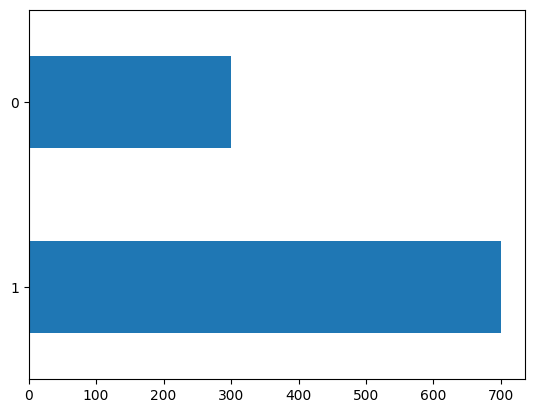

In [5]:
print(data['Creditability'].value_counts())
print(data['Creditability'].value_counts(normalize = True))

data['Creditability'].value_counts().plot(kind = 'barh')
plt.show()

## 2.데이터 준비


### 1) x, y로 나누기

In [6]:
target = 'Creditability'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

### 2) 가변수화

In [7]:
dummy_vars = ['SexMarital', 'MostValuableAsset','ForeignWorker','Telephone']

x = pd.get_dummies(x, columns = dummy_vars, drop_first = True)
x.head()

,AccountBalance,Duration,Payment,Purpose,CreditAmount,Employment,CurrentAddress,Age,Apartment,CreditCount,Occupation,Dependents,SexMarital_2,SexMarital_3,SexMarital_4,MostValuableAsset_2,MostValuableAsset_3,MostValuableAsset_4,ForeignWorker_2,Telephone_2
0,3,24,2,0,1249,2,2,28,2,1,3,1,0,0,1,0,0,0,0,0
1,2,9,2,0,276,3,4,22,1,1,2,1,0,0,1,0,0,0,0,0
2,1,18,3,2,1049,2,4,21,1,1,3,1,1,0,0,1,0,0,0,0
3,1,24,3,1,6419,5,4,44,3,2,4,2,1,0,0,0,0,1,0,1
4,3,12,2,2,1424,5,4,55,2,1,4,1,1,0,0,0,0,0,0,1


### 3) train : validation 분할

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 20)

In [10]:
x_train.shape

(800, 20)

## 3.모델링

In [11]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

### 1) 학습

In [12]:
# 기본값으로 모델링
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### 2) 예측 및 평가
* validation set으로 예측하고 평가하시오.

In [13]:
pred1 = model.predict(x_val)

In [14]:
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

[[ 27  44]
 [ 14 115]]
              precision    recall  f1-score   support

           0       0.66      0.38      0.48        71
           1       0.72      0.89      0.80       129

    accuracy                           0.71       200
   macro avg       0.69      0.64      0.64       200
weighted avg       0.70      0.71      0.69       200



In [15]:
cm1 = confusion_matrix(y_val, pred1)

## 4.비즈니스 기대가치 평가

* 비즈니스 가치 matrix

In [16]:
bv = np.array([[0, -0.18],[0, 0.08]])
bv

array([[ 0.  , -0.18],
       [ 0.  ,  0.08]])

* 모델의 성적표 (Confusion matrix)

In [17]:
cm_p = cm1 / np.sum(cm1)

In [18]:
cm_p

array([[0.135, 0.22 ],
       [0.07 , 0.575]])

* 기대가치 계산하기

In [19]:
np.sum(cm_p * bv) * 3200

20.48000000000001

## 5.실습 : 모델 개선하기

* 위에서 만든 모델보다 좀더 나은 모델을 만들어 봅시다.
* 다양한 모델을 만들어 봅시다. (최소 2개 이상)
    * 여러 알고리즘
    * 하이퍼파라미터 튜닝(GridSearchCV, RandomizedSearchCV)

* RandomForest 튜닝

In [20]:
param = {'max_depth':range(2,10), 'n_estimators':range(50,201,50)}
model2 = GridSearchCV(RandomForestClassifier(), param, cv = 5)

model2.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 10),
                         'n_estimators': range(50, 201, 50)})

In [21]:
# 튜닝 결과
model2.best_params_, model2.best_score_

({'max_depth': 9, 'n_estimators': 50}, 0.75875)

In [22]:
# 예측 결과 및 평가
pred2 = model2.predict(x_val)
cm2 = confusion_matrix(y_val, pred2)

In [23]:
# 비즈니스 기대가치 계산하기
np.sum(cm2/np.sum(cm2) * bv) * 3200

16.32

* LightGBM

In [24]:
param = {'max_depth':range(2,6), 'n_estimators':range(50,201,50), 'learning_rate':[0.01,0.05,0.1,0.15]}
model3 = GridSearchCV(LGBMClassifier(early_stopping_rounds = 5), param, cv = 5)

eval_set = [(x_train, y_train), (x_val, y_val)]
model3.fit(x_train, y_train, eval_set=eval_set)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
[42]	valid_0's binary_logloss: 0.458497	valid_1's binary_logloss: 0.582784
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Info] Number of positive: 457, number of negative: 183
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 20
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.714063 -> initscore=0.9151

GridSearchCV(cv=5, estimator=LGBMClassifier(early_stopping_rounds=5),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15],
                         'max_depth': range(2, 6),
                         'n_estimators': range(50, 201, 50)})

In [25]:
# 예측 결과 및 평가
pred3 = model3.predict(x_val)
cm3 = confusion_matrix(y_val, pred3)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [26]:
# 비즈니스 기대가치 계산하기
np.sum(cm3/np.sum(cm3) * bv) * 3200

20.16

* 개선된 모델과 이전 모델에 대해서 다음의 항목으로 평가하시오.
    * ML Metric : Accuracy
    * Business Metric : 예상 수익
* 산출된 결과에 대한 여러분의 의견을 작성해주세요.

In [27]:
# classification_report
print(classification_report(y_val, pred1))
print('-'*50)
print(classification_report(y_val, pred2))
print('-'*50)
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.66      0.38      0.48        71
           1       0.72      0.89      0.80       129

    accuracy                           0.71       200
   macro avg       0.69      0.64      0.64       200
weighted avg       0.70      0.71      0.69       200

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.31      0.44        71
           1       0.72      0.95      0.82       129

    accuracy                           0.73       200
   macro avg       0.75      0.63      0.63       200
weighted avg       0.74      0.72      0.68       200

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.37      0.48        71
           1       0.72      0.91      0.80       129

    accuracy                           0.71       200
   macro avg       0.70   

* 기대가치 비교하기

In [28]:
biz_value1 = np.sum(cm1/np.sum(cm1) * bv) * 3200
biz_value2 = np.sum(cm2/np.sum(cm2) * bv) * 3200
biz_value3 = np.sum(cm3/np.sum(cm3) * bv) * 3200

print(f'model1 : $ {round(biz_value1,2)}')
print(f'model2 : $ {round(biz_value2,2)}')
print(f'model3 : $ {round(biz_value3,2)}')

model1 : $ 20.48
model2 : $ 16.32
model3 : $ 20.16


In [29]:
print((cm1/np.sum(cm1) * bv * 3200))
print('-'*50)
print((cm2/np.sum(cm2) * bv * 3200))
print('-'*50)
print((cm3/np.sum(cm3) * bv * 3200))

[[   0.   -126.72]
 [   0.    147.2 ]]
--------------------------------------------------
[[   0.   -141.12]
 [   0.    157.44]]
--------------------------------------------------
[[   0.   -129.6 ]
 [   0.    149.76]]


## 6.[추가]성능 튜닝시 평가지표 교체

* 튜닝시 Classification의 평가함수는 기본적으로 accuracy 입니다.
* 이를 최대화 하는 하이퍼파라미터를 찾게 됩니다.
* 비즈니스 평가 계산 함수를 만들고, 튜닝평가 함수를 교체하여 튜닝해 봅시다.

### 1) 비즈니스 기대가치 지표로 평가할 함수 생성

In [30]:
def biz_score(y, pred, biz_v):
    cm = confusion_matrix(y, pred)
    cm_p = cm / np.sum(cm)
    amt_mean = 3200

    return np.sum(biz_v * cm_p) * amt_mean

In [31]:
b_score = make_scorer(biz_score, greater_is_better = True, biz_v = bv )

### 2) 기대가치를 최대화 해주는 하이퍼파라미터 찾기

In [32]:
param = {'max_depth':range(2,10), 'n_estimators':range(50,201,50)}
model4 = GridSearchCV(RandomForestClassifier(), param, cv = 5,
                      scoring=b_score)
# 학습
model4.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 10),
                         'n_estimators': range(50, 201, 50)},
             scoring=make_scorer(biz_score, biz_v=[[ 0.   -0.18]
 [ 0.    0.08]]))

* best params, best score(비즈니스 기대가치)

In [33]:
model4.best_params_, model4.best_score_

({'max_depth': 9, 'n_estimators': 50}, 59.20000000000001)

* 튜닝 과정에 대한 그래프를 그려봅시다.

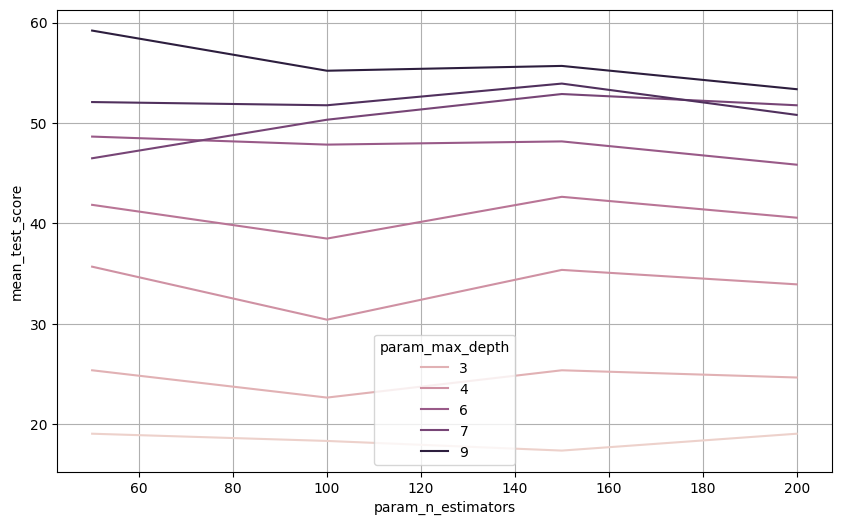

In [34]:
result = pd.DataFrame(model4.cv_results_)
result.loc[:, ['param_max_depth', 'param_n_estimators', 'mean_test_score' ]]

plt.figure(figsize = (10,6))
sns.lineplot(x=result['param_n_estimators'], y=result['mean_test_score'], hue = result['param_max_depth'])

plt.grid()
plt.show()

In [35]:
# 예측 결과 및 평가
pred4 = model4.predict(x_val)
cm4 = confusion_matrix(y_val, pred4)

In [36]:
# 비즈니스 기대가치 계산하기
np.sum(cm4/np.sum(cm4) * bv) * 3200

25.6